In [1]:
%cd ~/SSF

/home/zxy/SSF


# 可视化模型的 Scale&Shift 参数
## ViT-b16

In [2]:
import sys
import os
PROJECT_ROOT="/home/wyh/PEFT/SSF"
PROJECT_ROOT="/home/wyh/SSF"
SAVED_ROOT="/media/disk1/wyh/SSF"
sys.path.append(PROJECT_ROOT)
import torch
import timm
from timm.models import create_model, safe_model_name, resume_checkpoint, load_checkpoint,\
    convert_splitbn_model, model_parameters
from models import vision_transformer, swin_transformer, convnext, as_mlp
import numpy as np



In [35]:

# model = create_model(
#     MODEL_NAME,
#     pretrained=True,
#     num_classes=NUM_CLASSES,
#     drop_rate=0.0,
#     drop_path_rate=0.0,
#     drop_block_rate=None,
#     global_pool=None,
#     bn_momentum=None,
#     bn_eps=None,
#     scriptable=False,
#     checkpoint_path='',
#     tuning_mode=METHOD_NAME)
# resume_epoch = resume_checkpoint(
#     model, MODEL_PATH,
#     optimizer=None,
#     loss_scaler=None,
#     log_info=True)

def load_model(name,num,method,path):
    model = create_model(
        name,
        pretrained=True,
        num_classes=num,
        drop_rate=0.0,
        drop_path_rate=0.0,
        drop_block_rate=None,
        global_pool=None,
        bn_momentum=None,
        bn_eps=None,
        scriptable=False,
        checkpoint_path='',
        tuning_mode=method)
    resume_epoch = resume_checkpoint(
        model, path,
        optimizer=None,
        loss_scaler=None,
        log_info=True)
    return model


In [36]:
name="vit_base_patch16_224_in21k"
path="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234152-vit_base_patch16_224_in21k-224/checkpoint-90.pth.tar"
path="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234152-vit_base_patch16_224_in21k-224/model_best.pth.tar"
path="/media/disk1/wyh/SSF/vit_base_patch16_224_in21k/cifar_100/pruning_no_ema/20230608-234424-vit_base_patch16_224_in21k-224/model_best.pth.tar"
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231007-050355-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# MODEL_PATH='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231019-162813-vit_base_patch16_224_in21k-224/model_best.pth.tar'
# MODEL_PATH='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-162944-vit_base_patch16_224_in21k-224/model_best.pth.tar'
path=''
method="ssf"
num=100
model=load_model(name,num,method,path)

In [39]:
name="vit_base_patch16_224_in21k"
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/sun397/pruning_rec_loss/20231007-051610-vit_base_patch16_224_in21k-224/model_best.pth.tar'
method="ssf"
num=397

model=load_model(name,num,method,path)

In [41]:
name="vit_base_patch16_224_in21k"
method="ssf"
path='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/fgvc/stanford_dogs/pruning_rec_loss/20231022-145236-vit_base_patch16_224_in21k-224/model_best.pth.tar'
num=120
model=load_model(name,num,method,path)


In [4]:

model = create_model(
    MODEL_NAME,
    pretrained=True,
    num_classes=NUM_CLASSES,
    drop_rate=0.0,
    drop_path_rate=0.0,
    drop_block_rate=None,
    global_pool=None,
    bn_momentum=None,
    bn_eps=None,
    scriptable=False,
    checkpoint_path='',
    tuning_mode=METHOD_NAME)
resume_epoch = resume_checkpoint(
    model, MODEL_PATH,
    optimizer=None,
    loss_scaler=None,
    log_info=True)


In [4]:
# for i,(name,module) in enumerate(model.named_modules()) :
#     # print(name)
#     cw=False
#     for m in module.children():
#         if hasattr(m,"weight"):
#             cw=True
#     if cw:
#     # if hasattr(module,"weight"):
#         print(i,"\t",name)
#         print("PARAMETER: ")
#         for n,p in module.named_parameters():
#             print(n,"\t",p.shape)
#         print("DICT:")
#         # print(type(module.weight),module.weight.size())
#         for k in module.__dict__:
#             print("\t",k)
# for j,(name,parameters) in enumerate(model.named_parameters()):
#     key=["ssf_scale","ssf_scale"]
#     if any([k in name for k in key]):
#         print("{}\t{}\t{}\t{}".format(j,name,parameters.shape,parameters.data.shape))        
    

In [42]:
i=0
sp,s=0,0
ssf_scale,ssf_shift={},{}
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale[name]=para.data.detach().cpu().numpy()
        data=ssf_scale[name].flatten()
        pruned=np.sum(data < 1e-2)
        sp+=np.sum(data < 1e-2)
        s+=len(data)
        print(f'{name:30} {pruned/len(data):.4f} {len(data)}')
    elif "ssf_shift" in name:
        i+=1
        ssf_shift[name]=para.data.detach().cpu().numpy()
    else:
        pass
print(i)
print(sp/s)

ssf_scale_1                    0.0052 768
patch_embed.ssf_scale_1        0.3151 768
blocks.0.ssf_scale_1           0.4648 768
blocks.0.ssf_scale_2           0.4753 768
blocks.0.attn.ssf_scale_1      0.3433 2304
blocks.0.attn.ssf_scale_2      0.1536 768
blocks.0.mlp.ssf_scale_1       0.0182 3072
blocks.0.mlp.ssf_scale_2       0.0260 768
blocks.1.ssf_scale_1           0.1589 768
blocks.1.ssf_scale_2           0.1823 768
blocks.1.attn.ssf_scale_1      0.3277 2304
blocks.1.attn.ssf_scale_2      0.0208 768
blocks.1.mlp.ssf_scale_1       0.0736 3072
blocks.1.mlp.ssf_scale_2       0.0312 768
blocks.2.ssf_scale_1           0.0547 768
blocks.2.ssf_scale_2           0.0299 768
blocks.2.attn.ssf_scale_1      0.2192 2304
blocks.2.attn.ssf_scale_2      0.0352 768
blocks.2.mlp.ssf_scale_1       0.1126 3072
blocks.2.mlp.ssf_scale_2       0.0612 768
blocks.3.ssf_scale_1           0.0273 768
blocks.3.ssf_scale_2           0.0156 768
blocks.3.attn.ssf_scale_1      0.2917 2304
blocks.3.attn.ssf_scale_2  

In [6]:
# show basic info of ssf_scale and ssf_shift:
print("Length: ",len(ssf_scale),"\t",len(ssf_shift))
print("SSF_SCALE:")
for k in ssf_scale:
    print(k,ssf_scale[k].shape)
print("SSF_SHIFT:")
for k in ssf_shift:
    print(k,ssf_shift[k].shape)

Length:  74 	 74
SSF_SCALE:
ssf_scale_1 (768,)
patch_embed.ssf_scale_1 (768,)
blocks.0.ssf_scale_1 (768,)
blocks.0.ssf_scale_2 (768,)
blocks.0.attn.ssf_scale_1 (2304,)
blocks.0.attn.ssf_scale_2 (768,)
blocks.0.mlp.ssf_scale_1 (3072,)
blocks.0.mlp.ssf_scale_2 (768,)
blocks.1.ssf_scale_1 (768,)
blocks.1.ssf_scale_2 (768,)
blocks.1.attn.ssf_scale_1 (2304,)
blocks.1.attn.ssf_scale_2 (768,)
blocks.1.mlp.ssf_scale_1 (3072,)
blocks.1.mlp.ssf_scale_2 (768,)
blocks.2.ssf_scale_1 (768,)
blocks.2.ssf_scale_2 (768,)
blocks.2.attn.ssf_scale_1 (2304,)
blocks.2.attn.ssf_scale_2 (768,)
blocks.2.mlp.ssf_scale_1 (3072,)
blocks.2.mlp.ssf_scale_2 (768,)
blocks.3.ssf_scale_1 (768,)
blocks.3.ssf_scale_2 (768,)
blocks.3.attn.ssf_scale_1 (2304,)
blocks.3.attn.ssf_scale_2 (768,)
blocks.3.mlp.ssf_scale_1 (3072,)
blocks.3.mlp.ssf_scale_2 (768,)
blocks.4.ssf_scale_1 (768,)
blocks.4.ssf_scale_2 (768,)
blocks.4.attn.ssf_scale_1 (2304,)
blocks.4.attn.ssf_scale_2 (768,)
blocks.4.mlp.ssf_scale_1 (3072,)
blocks.4.mlp.s

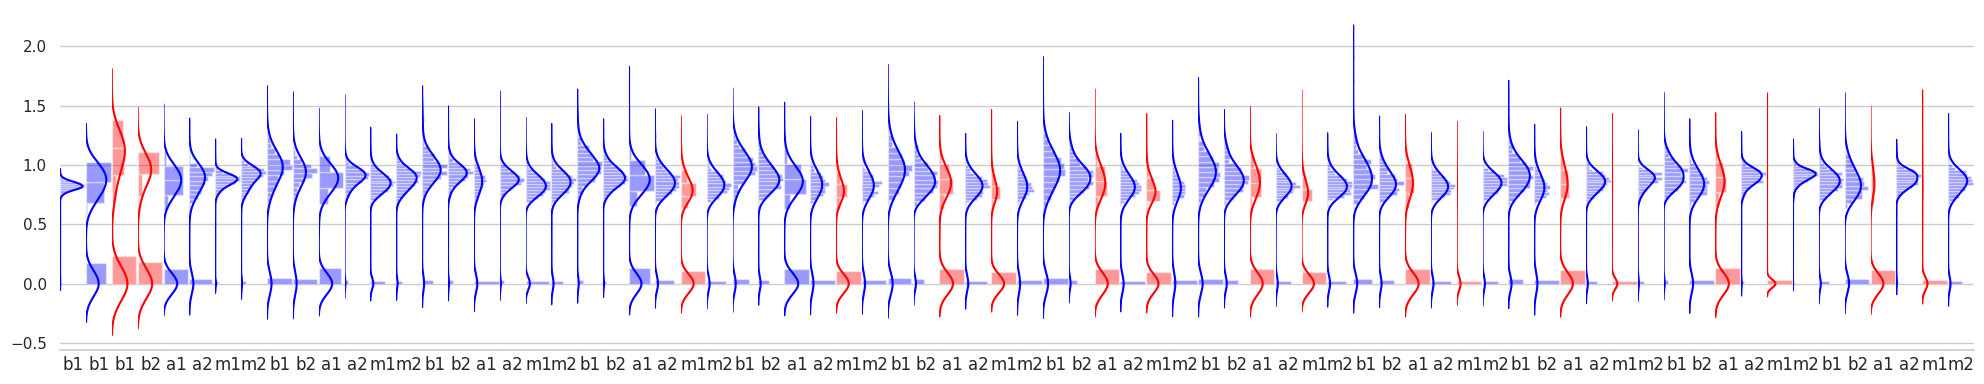

MAX Scale:  1.9329468
MIN Scale:  -0.0011671847
MAX Shift:  0.45498723
MIN Shift:  -0.35401744


In [45]:
import warnings
warnings. filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.models as models

def get_pratio(data):
    pruned=np.sum([data < 0.01])
    return pruned/len(data)

def draw6(row1,name=None):
    data=row1
    arr = data
    up_mean=np.mean(np.array([a.max() for a in arr]))
    lw_mean=np.mean(np.array([a.min() for a in arr]))
    num_rows = len(arr)
    fig, axs = plt.subplots(ncols=num_rows, nrows=1, sharey=True,gridspec_kw={"hspace": 0, "wspace": 0})
    fig.set_size_inches(20, 4)
    lw=lw_mean*1.5 if lw_mean<0 else lw_mean*0.5
    ran=(lw,up_mean*1.5)
    ran=(lw,up_mean*1.5)
    for i in range(num_rows):
        # sns.histplot(y=arr[i], ax=axs[i], kde=True, stat="density")
        # sns.distplot(arr[i], ax=axs[i], kde=True, stat="density",hist_kws={'range': (0.0, 0.2)})
        color="blue"
        # if arr[i].max() > up_mean*1.2 or arr[i].min() < lw_mean*0.8:
        #     color="red"
        if get_pratio(arr[i]) > 0.35:
            color="red"
        sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color)
        # sns.distplot(arr[i], ax=axs[i], kde=True, vertical=True,color=color,\
        #     hist_kws={'range': ran},kde_kws={'clip': ran})
        # sns.histplot(data, clip=(0, 10))
        axs[i].set_xticks([])
        # axs[i].set_xlabel(f"{i+1}")
        label=""
        if 'attn' in name[i]:
            label+="a"
        elif 'mlp' in name[i]:
            label+="m"
        else:
            label+="b"
        label+=name[i].split("_")[-1]
        axs[i].set_xlabel(label)
    plt.tight_layout()
    # sns.set_style('white')
    sns.set(style='whitegrid')
    sns.despine(right=True,left=True)
    plt.show()
ssf_scale_list,ssf_shift_list,ssf_scale_name,ssf_shift_name=[],[],[],[]
for name, para in model.named_parameters():
    if "ssf_scale" in name:
        ssf_scale_list.append(para.data.detach().cpu().numpy())
        ssf_scale_name.append(name)
    elif "ssf_shift" in name:
        ssf_shift_list.append(para.data.detach().cpu().numpy())
        ssf_shift_name.append(name)
    else:
        pass
draw6(ssf_scale_list,ssf_scale_name)
# draw6(ssf_shift_list,ssf_shift_name)
print("MAX Scale: ", max([s.max() for s in ssf_scale_list]))
print("MIN Scale: ", min([s.min() for s in ssf_scale_list]))
print("MAX Shift: ", max([s.max() for s in ssf_shift_list]))
print("MIN Shift: ", min([s.min() for s in ssf_shift_list]))

In [8]:
# print("MIN Scale: ", min([s.min() for s in ssf_scale_list]))
# print("MAX Shift: ", max([s.max() for s in ssf_shift_list]))
sc_num=0
sc_pnm=0
for i,(sc,sh) in enumerate(zip(ssf_scale_list,ssf_shift_list)):
    # select indexes from sc, where abs value is less than 0.02
    # indexes=np.where(np.abs(sc)<0.02)
    indexes=np.argwhere(np.abs(sc)<0.01)
    subsc=np.take(sc,indexes)
    sc_pnm+=len(subsc)
    sc_num+=len(sc)
    subsh=np.take(sh,indexes)
    
    # subsh=np.take(sh,indexes)
    print("{:.2f} Layer {}:\t{}/{}\t{:.2f}%".format(np.abs(subsh).mean(), i,len(subsc),len(sc),len(subsc)/len(sc)*100))
print("Total:\t{}/{}\t{:.2f}%".format(sc_pnm,sc_num,sc_pnm/sc_num*100))

nan Layer 0:	0/768	0.00%
0.02 Layer 1:	2/768	0.26%
0.00 Layer 2:	266/768	34.64%
0.01 Layer 3:	246/768	32.03%
0.00 Layer 4:	576/2304	25.00%
nan Layer 5:	0/768	0.00%
0.00 Layer 6:	13/3072	0.42%
nan Layer 7:	0/768	0.00%
0.00 Layer 8:	78/768	10.16%
0.01 Layer 9:	53/768	6.90%
0.00 Layer 10:	358/2304	15.54%
nan Layer 11:	0/768	0.00%
0.00 Layer 12:	23/3072	0.75%
nan Layer 13:	0/768	0.00%
0.00 Layer 14:	26/768	3.39%
0.03 Layer 15:	16/768	2.08%
0.00 Layer 16:	46/2304	2.00%
nan Layer 17:	0/768	0.00%
nan Layer 18:	0/3072	0.00%
nan Layer 19:	0/768	0.00%
0.01 Layer 20:	7/768	0.91%
0.00 Layer 21:	3/768	0.39%
0.00 Layer 22:	58/2304	2.52%
nan Layer 23:	0/768	0.00%
nan Layer 24:	0/3072	0.00%
nan Layer 25:	0/768	0.00%
0.00 Layer 26:	11/768	1.43%
0.03 Layer 27:	2/768	0.26%
0.00 Layer 28:	84/2304	3.65%
nan Layer 29:	0/768	0.00%
nan Layer 30:	0/3072	0.00%
nan Layer 31:	0/768	0.00%
0.00 Layer 32:	15/768	1.95%
0.01 Layer 33:	5/768	0.65%
0.00 Layer 34:	88/2304	3.82%
nan Layer 35:	0/768	0.00%
nan Layer 36:	0/3

In [9]:
# def print_outler(row1,name=None):
#     data=row1
#     arr = data
#     up_mean=np.mean(np.array([a.max() for a in arr]))
#     lw_mean=np.mean(np.array([a.min() for a in arr]))
#     num_rows = len(arr)
#     lw=lw_mean*1.5 if lw_mean<0 else lw_mean*0.5
#     ran=(lw,up_mean*1.5)
#     for i in range(len(row1)):
#         if arr[i].max() > up_mean*1.2 or arr[i].min() < lw_mean*0.8:
#             print(name[i])
# print_outler(ssf_scale_list,ssf_scale_name)
# print_outler(ssf_shift_list,ssf_shift_name)


# 运行计时
5.23 00:35 开始运行 ./train_scripts/vit/cifar_vtab